<div style="text-align: center; margin: 0;">
  <img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" alt="UNAD Logo" style="max-width: 100%; height: auto;">
</div>

<p align="center">Curso: Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 203008067_15</p>

 <p align="center"> Fase 4 - Componente práctico - Prácticas simuladas</p>

 <p align="center">  Presentado por: Deiver Enrique Alfonso Cortes</p>

 <p align="center">  Tutor(a): Isaac Esteban Camargo Freile </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> 31 de julio 2024</p>


<!-- Estilos globales -->
<style>
    * {
        margin: 10px 0; /* Margenes para todos los elementos */
    }
    ul li {
        font-size: 15px;
    }
</style>

<h2>Información acerca del dataset.</h2>
<p>Columnas o variables que contiene el dataset <em>productividad_confeccion.csv</em></p>
<ul>
    <li><strong>date:</strong> Fecha en MM-DD-YYYY</li>
    <li><strong>day:</strong> Día de la semana.</li>
    <li><strong>quarter:</strong> Cuarto del mes. Un mes se dividió en cuatro partes.</li>
    <li><strong>department:</strong> Departamento asociado a la instancia.</li>
    <li><strong>team_no:</strong> Número de equipo asociado con la instancia.</li>
    <li><strong>no_of_workers:</strong> Número de trabajadores en cada equipo.</li>
    <li><strong>no_of_style_change:</strong> Número de cambios en el estilo de un producto.</li>
    <li><strong>targeted_productivity:</strong> Productividad objetivo establecida por la Autoridad para cada equipo en cada día.</li>
    <li><strong>smv:</strong> Valor Minuto Estándar, es el tiempo asignado para una tarea.</li>
    <li><strong>wip:</strong> Trabajo en progreso. Incluye la cantidad de elementos sin terminar por productos.</li>
    <li><strong>over_time:</strong> Representa la cantidad de tiempo extra de cada equipo en minutos.</li>
    <li><strong>incentive:</strong> Representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción particular.</li>
    <li><strong>idle_time:</strong> La cantidad de tiempo que la producción estuvo interrumpida por varias razones.</li>
    <li><strong>idle_men:</strong> El número de trabajadores que estuvieron inactivos debido a la interrupción de la producción.</li>
    <li><strong>actual_productivity:</strong> Porcentaje real de productividad que entregaron los trabajadores.</li>
</ul>



<h2>Exploración de los datos</h2>

In [100]:
# Importación de librerías de uso global.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Carga del dataset.
df = pd.read_csv('./data/productividad_confeccion.csv')
# Visualización del dataset.
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [102]:
# Exploración inicial
print("Tipos de datos:\n", df.dtypes)
# Eliminar espacios en los nombres de las columnas (si los hay)
df.columns = df.columns.str.strip()
# Shape del dataframe
print('shape dataframe:', df.shape)

Tipos de datos:
 date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object
shape dataframe: (1197, 15)


# Acción 1: Aplicación máquinas de soporte vectorial.

___

<h2>Procesamiento de datos</h2>

In [103]:
df_svm = df.copy()

# Los valores nulos para wip los representaremos como 0, es decir que no había trabajo en progreso en ese momento.
df_svm["wip"] = df_svm["wip"].fillna(0)

# Mostrar la cantidad de valores nulos por columna
print(df_svm.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [104]:
# Convertir date a formato datetime
df_svm["date"] = pd.to_datetime(df_svm["date"], format="%m/%d/%Y")

# Dividir en columnas year, month y day_of_month la fecha
df_svm["year"] = df_svm["date"].dt.year
df_svm["month"] = df_svm["date"].dt.month
df_svm["day_of_month"] = df_svm["date"].dt.day

df_svm.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month,day_of_month
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,2015,1,1
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1,1


In [105]:
from sklearn.model_selection import train_test_split

# División del Dataset
X_svm = df_svm[
    [
        "year",
        "month",
        "day_of_month",
        "day",
        "quarter",
        "department",
        "team",
        "targeted_productivity",
        "smv",
        "wip",
        "over_time",
        "incentive",
        "idle_time",
        "idle_men",
        "no_of_style_change",
        "no_of_workers",
    ]
]
y_svm = df_svm["actual_productivity"]

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.2, random_state=42
)

In [106]:
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Columnas categóricas
categorical_features = ["day", "quarter", "department"]
one_hot_encoder = OneHotEncoder()
X_train_svm_categorical = one_hot_encoder.fit_transform(
    X_train_svm[categorical_features]
)
X_test_svm_categorical = one_hot_encoder.transform(X_test_svm[categorical_features])

# Columnas numéricas
numeric_features = [
    "year",
    "month",
    "day_of_month",
    "team",
    "targeted_productivity",
    "smv",
    "wip",
    "over_time",
    "incentive",
    "idle_time",
    "idle_men",
    "no_of_style_change",
    "no_of_workers",
]

# Normalizar los datos
scaler = StandardScaler()
X_train_svm_numeric = scaler.fit_transform(X_train_svm[numeric_features])
X_test_svm_numeric = scaler.transform(X_test_svm[numeric_features])

# Combinar las características preprocesadas
X_train_svm_preprocessed = hstack([X_train_svm_categorical, X_train_svm_numeric])
X_test_svm_preprocessed = hstack([X_test_svm_categorical, X_test_svm_numeric])

<h2>Entrenamiento del modelo</h2>

<h4>Selección del Kernel - validación cruzada </h4>
<p>Validar el rendimiento de cada modelo con distintos kernels</p>

In [107]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Definir el modelo SVR con GridSearchCV para probar diferentes kernels
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [1, 10, 100],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train_svm_preprocessed, y_train_svm)

# # Obtener los mejores parámetros y el mejor estimador
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# print(f'Mejores parámetros: {best_params}')
# El print: Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

# Nota: Este paso puede tardar aproximadamente entre 10 y 20 segundos, ya que necesita procesar los modelos mapeados en param_grid.
# Para evitar ralentizar la ejecución, estas líneas han sido comentadas.

In [108]:
from sklearn.svm import SVR
# Aplicación del Modelo SVR
model_svm = SVR(kernel='rbf', C=1, gamma="scale")
model_svm.fit(X_train_svm_preprocessed, y_train_svm)

# Realización de Predicciones sobre test
y_pred_svm = model_svm.predict(X_test_svm_preprocessed)
y_pred_svm

array([0.56905776, 0.82926712, 0.75567298, 0.65323646, 0.74451221,
       0.74929327, 0.71410185, 0.68177629, 0.58042827, 0.72988114,
       0.6950222 , 0.94044201, 0.80640627, 0.76726177, 0.7857226 ,
       0.83135076, 0.97215194, 0.65058813, 0.49272837, 0.82791752,
       0.95647318, 0.65881638, 0.88516297, 0.84400921, 0.84811401,
       0.56227712, 0.72134426, 0.89939486, 0.60660091, 0.88543605,
       0.8654395 , 0.78710659, 0.86334888, 0.81277064, 0.70792479,
       0.57863445, 0.76017408, 0.81526839, 0.84787572, 0.73652475,
       0.69215947, 0.80602544, 0.68748792, 0.80486294, 0.73110655,
       0.73473762, 0.51114313, 0.86352424, 0.83617908, 0.73242066,
       0.8997838 , 0.83610635, 0.74340913, 0.77669974, 0.58301436,
       0.62953501, 0.55793756, 0.6947664 , 0.78956465, 0.75385827,
       0.69887111, 0.76444133, 0.54553205, 0.8284414 , 0.488146  ,
       0.76415185, 0.81680216, 0.83066759, 0.55241674, 0.58662091,
       0.73733096, 0.75120975, 0.62594177, 0.72544873, 0.61595

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Métricas
mse = mean_squared_error(y_test_svm, y_pred_svm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_svm, y_pred_svm)
r2 = r2_score(y_test_svm, y_pred_svm)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Coeficiente de Determinación (R²): {r2}')
# Score calcula el mismo valor que el r2_score.
print(f'Precisión del Modelo SVM: {model_svm.score(X_test_svm_preprocessed, y_test_svm)}')

Error Cuadrático Medio (MSE): 0.016869293649019845
Raíz del Error Cuadrático Medio (RMSE): 0.12988184495540492
Error Absoluto Medio (MAE): 0.09402744513304008
Coeficiente de Determinación (R²): 0.3646807299798924
Precisión del Modelo SVM: 0.3646807299798924


# Acción 2: Aplicación K-Means.

___

<h2>Procesamiento de datos</h2>

In [110]:
df_km = df.copy()
# Los valores nulos para wip los representaremos como 0, es decir que no había trabajo en progreso en ese momento.
df_km["wip"] = df_km["wip"].fillna(0)

# Mostrar la cantidad de valores nulos por columna
print(df_km.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [111]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack

# Columnas categóricas
categorical_features = ["day", "quarter", "department"]
one_hot_encoder = OneHotEncoder()
categorical_encoded = one_hot_encoder.fit_transform(df_km[categorical_features])

# Columnas numéricas
numeric_features = [
    "team",
    "targeted_productivity",
    "smv",
    "wip",
    "over_time",
    "incentive",
    "idle_time",
    "idle_men",
    "no_of_style_change",
    "no_of_workers",
    # "actual_productivity",
]
# Con actual_productivity
# Clusters pueden estar altamente influenciados por la productividad real.
# Los perfiles de los clusters pueden simplemente reflejar la alta o baja productividad sin dar información clara sobre las causas subyacentes.

# Sin actual_productivity.
# Clusters basados en características operativas y condiciones de trabajo.
# Proporciona una visión más clara sobre cómo ajustar incentivos, gestionar el tiempo de inactividad, y optimizar la asignación de recursos para mejorar la productividad.


# Escalar las características o estandarizar datos.
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df_km[numeric_features])

# Combinar las características preprocesadas
data_preprocessed = hstack([categorical_encoded, numeric_scaled])

<h2>Número Óptimo de Clusters</h2>

<h4>Método del Codo</h4>

El número óptimo de clusters 3
El número óptimo de clusters usando KneeLocator 3


C:\Users\wwwde\AppData\Local\Temp\ipykernel_24640\1007378992.py:23: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)


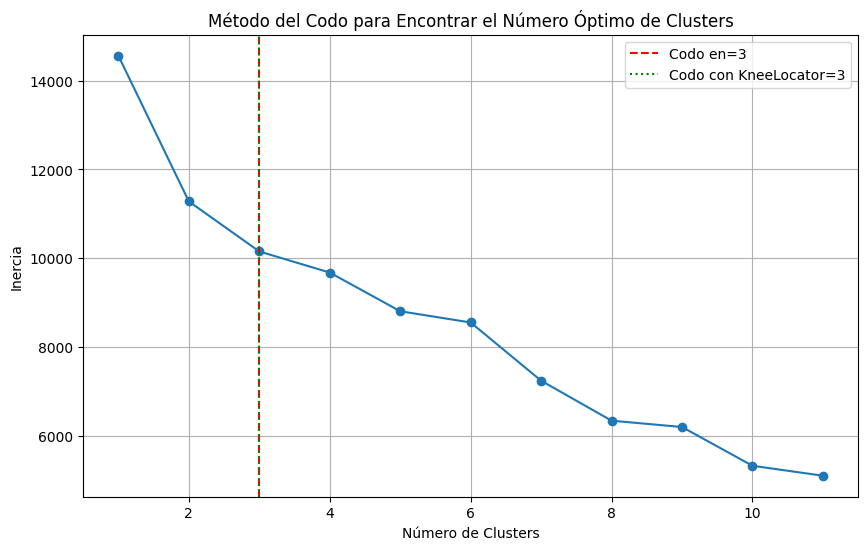

In [112]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

inertia = []
range_n_clusters = range(1, 12)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_preprocessed)
    inertia.append(kmeans.inertia_)

# Agregar referencia del profesor aqui.
# Función para encontrar el codo usando la distancia máxima desde la línea
def find_elbow_point(x, y):
    # Crear la línea desde el primer hasta el último punto
    line = np.array([x[0], y[0], x[-1], y[-1]])

    # Calcular la distancia de cada punto a la línea
    distances = []
    for i in range(len(x)):
        p1 = np.array([x[0], y[0]])
        p2 = np.array([x[-1], y[-1]])
        p = np.array([x[i], y[i]])
        distance = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
        distances.append(distance)

    # El punto con la máxima distancia es el codo
    elbow_index = np.argmax(distances)
    return x[elbow_index]

# Encontrar el codo
elbow_point = find_elbow_point(range_n_clusters, inertia)
print("El número óptimo de clusters", elbow_point)

# Segunda forma de encontrar el punto de codo.
kneedle = KneeLocator(range_n_clusters, inertia, curve="convex", direction="decreasing")
elbow_point_kneedle = kneedle.elbow
print("El número óptimo de clusters usando KneeLocator", elbow_point_kneedle)

# Grafica Método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker="o")
plt.title("Método del Codo para Encontrar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")

plt.axvline(
    x=elbow_point, linestyle="--", color="r", label="Codo en=%d" % elbow_point
)
plt.axvline(
    x=elbow_point_kneedle,
    linestyle=":",
    color="g",
    label="Codo con KneeLocator=%d" % elbow_point_kneedle,
)
plt.legend()

plt.grid(True)
plt.show()

<h4>Coeficiente de silueta</h4>

El número óptimo de clusters según la silueta es: 3


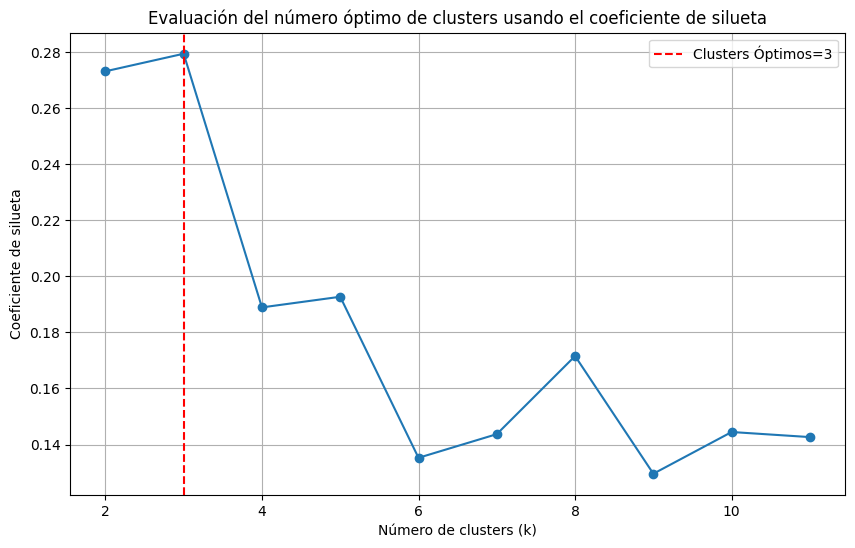

In [113]:
# Coeficiente de silueta para hallar el número óptimo de clusters.
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters_sil = range(2, 12)
for n_clusters_sil in range_n_clusters_sil:
    kmeans = KMeans(n_clusters=n_clusters_sil, random_state=42)
    cluster_labels = kmeans.fit_predict(data_preprocessed)
    silhouette_avg = silhouette_score(data_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Encuentra el índice donde el coeficiente de silueta es máximo
# +2 porque los clusters empiezan desde 2
optimal_clusters = np.argmax(silhouette_scores) + 2

print("El número óptimo de clusters según la silueta es:", optimal_clusters)

# Grafico de los puntajes de silueta
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters_sil, silhouette_scores, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficiente de silueta")
plt.title("Evaluación del número óptimo de clusters usando el coeficiente de silueta")

# Valor óptimo de clusters - Coeficiente de silueta
plt.axvline(x=optimal_clusters, linestyle="--", color="r", label="Clusters Óptimos=%d" % optimal_clusters)
plt.legend()

plt.grid(True)
plt.show()

In [114]:
# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
df_km['cluster'] = kmeans.fit_predict(data_preprocessed)
df_km.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,cluster
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,2
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,0
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167,2
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683,0
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098,0
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,0


In [115]:
# Columnas numéricas y columna de cluster para el cálculo de la media.
numeric_features_with_cluster = numeric_features + ['cluster']
profile_numeric = df_km[numeric_features_with_cluster].groupby('cluster').mean()

# Columnas categóricas y columna de cluster para calcular la moda
categorical_features_with_cluster = categorical_features + ['cluster']
profile_categorical = df_km[categorical_features_with_cluster].groupby('cluster').agg(lambda x: x.mode()[0])

# Combinar perfiles
profile_combined = pd.concat([profile_numeric, profile_categorical], axis=1)

profile_combined

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day,quarter,department
cluster,,,,,,,,,,,,,
0,6.595506,0.740918,22.591685,1274.378277,6976.161049,50.035581,0.006554,0.028090,0.000000,51.652622,Sunday,Quarter1,sweing
1,6.070513,0.665513,25.450256,897.544872,5163.461538,24.679487,5.580128,2.737179,1.153846,55.086538,Wednesday,Quarter4,sweing
2,6.358974,0.737475,3.935345,4.096647,1847.100592,29.919132,0.000000,0.000000,0.000000,10.358974,Wednesday,Quarter1,finishing


#### ¿Cuántos clusters sería adecuado seleccionar para representar eficientemente los diferentes tipos de equipos de trabajo?

El método del codo y el coeficiente de silueta sugieren que 3 clusters es una elección adecuada, ya que el gráfico mostró una inflexión en ese punto.

#### ¿Cuál es el perfil característico de cada cluster en términos de las variables proporcionadas?

In [116]:
profile_combined

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day,quarter,department
cluster,,,,,,,,,,,,,
0,6.595506,0.740918,22.591685,1274.378277,6976.161049,50.035581,0.006554,0.028090,0.000000,51.652622,Sunday,Quarter1,sweing
1,6.070513,0.665513,25.450256,897.544872,5163.461538,24.679487,5.580128,2.737179,1.153846,55.086538,Wednesday,Quarter4,sweing
2,6.358974,0.737475,3.935345,4.096647,1847.100592,29.919132,0.000000,0.000000,0.000000,10.358974,Wednesday,Quarter1,finishing


#### ¿Cómo podrían utilizarse estos clusters para mejorar la gestión de la producción y la asignación de recursos en la fábrica?

 El clúster 0 presenta altos valores de SMV y tiempo extra, lo que sugiere la necesidad de optimizar procesos para reducir estos tiempos adicionales. En el clúster 1, los altos niveles de inactividad y la cantidad de trabajadores inactivos indican áreas donde se podría intervenir para reducir los tiempos muertos y mejorar la eficiencia. El clúster 2 muestra menores valores de WIP y tiempo extra, pero esto debe interpretarse en el contexto de su menor número de trabajadores y su enfoque en el departamento.

La planificación del personal puede ajustarse en función de las características de cada clúster. Los equipos más grandes del clúster 0 pueden requerir más supervisión y coordinación para mantener la productividad, mientras que los equipos más pequeños del clúster 2, dedicados al acabado (finishing), pueden gestionarse con un enfoque diferente que minimice las interrupciones. Además, los incentivos financieros pueden utilizarse estratégicamente para mejorar la productividad. En el clúster 1, donde se observan altos niveles de inactividad, aumentar los incentivos podría motivar a los trabajadores y reducir estos tiempos muertos. En contraste, los clústeres 0 y 2, que ya reciben incentivos, pueden ser monitoreados para ajustar estos incentivos y asegurar que están optimizando la productividad.


# Acción 3: Aplicación clustering jerárquico aglomerativo.

___

In [117]:
df_ac = df.copy()


In [118]:
from sklearn.preprocessing import StandardScaler

# Variables relevantes
selected_columns = [
    "targeted_productivity",
    "smv",
    "over_time",
    "incentive",
    "idle_time",
    "no_of_workers",
    "actual_productivity",
]

data_selected = df_ac[selected_columns]

# Estandarizamos los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

scaled_data

array([[ 0.71913683,  1.01455214,  0.75058892, ..., -0.05747269,
         1.0992288 ,  1.17899449],
       [ 0.20815097, -1.01677766, -1.07768238, ..., -0.05747269,
        -1.19926822,  0.86809564],
       [ 0.71913683, -0.33387786, -0.2710921 , ..., -0.05747269,
        -0.18522542,  0.37542295],
       ...,
       [-0.81382076, -1.02043442, -1.07768238, ..., -0.05747269,
        -1.19926822, -0.62761858],
       [ 0.20815097, -1.11185341, -0.82674318, ..., -0.05747269,
        -0.88378824, -1.3141198 ],
       [-0.3028349 , -1.11185341, -1.14937929, ..., -0.05747269,
        -1.28940536, -1.95148852]])

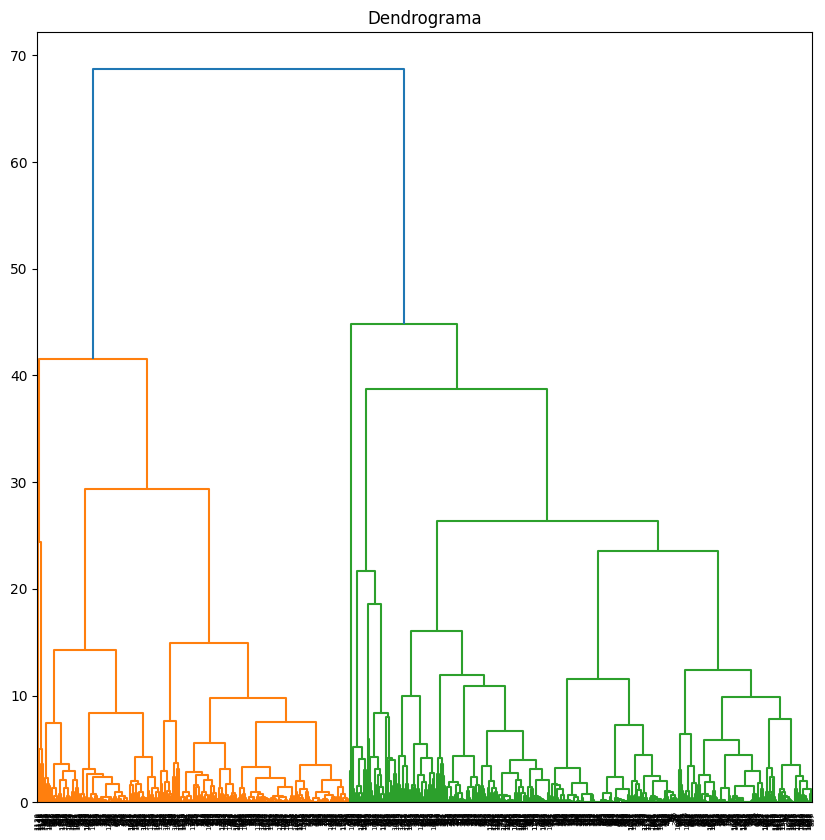

In [119]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Generar el dendrograma
plt.figure(figsize=(10, 10))
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.show()

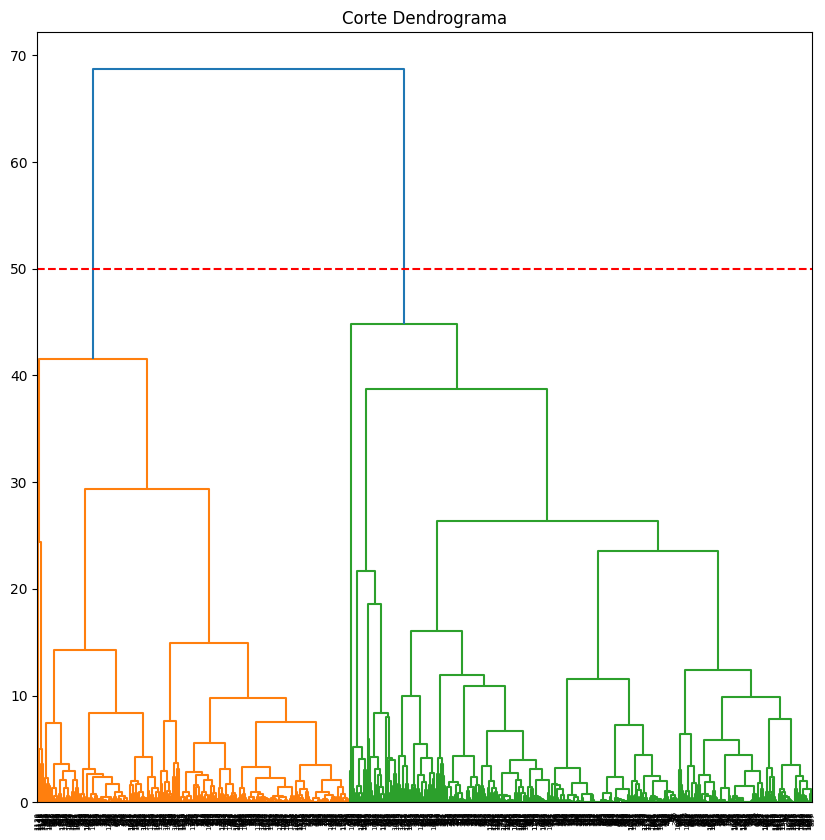

In [120]:
plt.figure(figsize=(10, 10))
plt.title("Corte Dendrograma")

linkage = shc.linkage(scaled_data, method="ward")
dend = shc.dendrogram(linkage)
plt.axhline(y=50, color="r", linestyle="--")
plt.show()

In [121]:
from sklearn.cluster import AgglomerativeClustering

# Basándonos en el dendrograma, elegimos el número de clusters 3
agg_clustering = AgglomerativeClustering(
    n_clusters=2, metric="euclidean", linkage="ward"
)
labels = agg_clustering.fit_predict(scaled_data)

# Agregamos los clusters al dataframe original
df_ac["cluster"] = labels

df_ac.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,cluster
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0


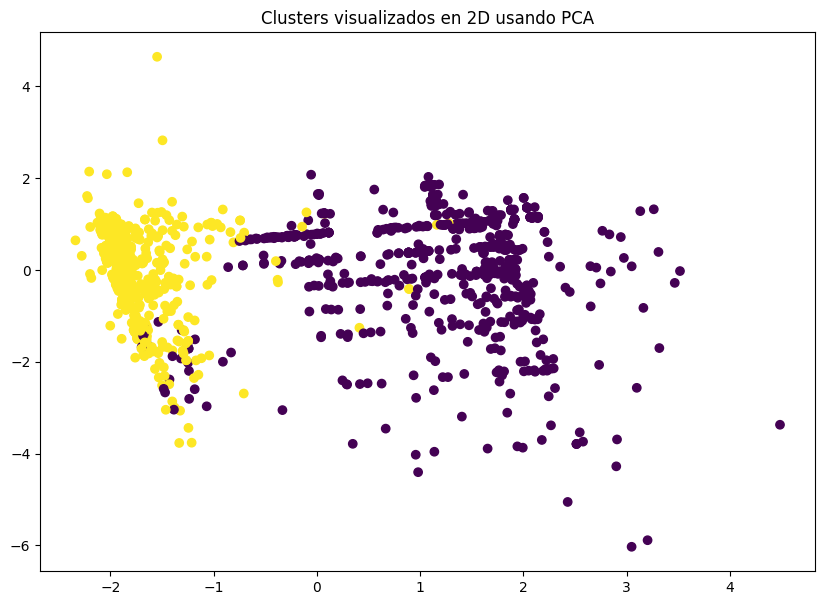

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_ac['cluster'], cmap='viridis')
plt.title('Clusters visualizados en 2D usando PCA')
plt.show()

# Concluiones

___

Para el primer modelo, donde la métrica R² resultó baja indicando un modelo inadecuado, es recomendable realizar una exploración más detallada de las características. Es crucial identificar y seleccionar aquellas características que puedan incrementar el valor de R² y mejorar la precisión del modelo.

En el caso del modelo de K-Means, se utilizaron diferentes métodos, como el método del codo y el coeficiente de silueta, para determinar el número óptimo de clusters. Estos análisis revelaron que 3 clusters segmentan los datos de manera efectiva, proporcionando diferentes características que ayudan en la toma de decisiones.

Finalmente, para el modelo de clustering jerárquico aglomerativo, se seleccionaron las características más importantes del dataset. Se realizó un dendrograma para determinar el número de clusters, observando visualmente un corte alrededor de 50, lo que resultó en 2 clusters que segmentan eficazmente el dataset.

# Referencias

<p>Murphy, K. P. (2012). Machine learning: a probabilistic perspective. MIT press.</p>
<p>Scikit-learn developers. (2024). scikit-learn: API reference. Scikit-learn. https://scikit-learn.org/stable/api/index.html (consultado el 29 de julio de 2024).</p>